In [1]:
import os
os.chdir('..')

# Post Analysis

To shed some light onto the models' inner prediction behavior, the predictions of a weighted ReNet18 with a
learning rate of $10{^-3}$ and a manually weighted ConvLSTM with intersecting sequences and a learning rate of $10{^-5}$
are being compared to the models true labels. Therefore, the models' daily predicted hard labels are vizualized as well as the
soft labels estimates (high colour saturation implies high soft label scores) for the two classes Tief Mitteleuropa (green) and
Trog Mitteleuropa (blue).

In [2]:
from post_analysis.plot_years import plot_year
from post_analysis.calc_label_freq import calc_rel_ctab

In [4]:
calc_rel_ctab('Trog', bins= [0, 2, 5, 10, 15])

C:\Users\Henri\LRZ Sync+Share\Semester3_Master\Climex\post_analysis\calc_label_freq.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trog['day'] = pd.cut(trog['days'], bins=bins)


day,"(0, 2]","(2, 5]","(5, 10]","(10, 15]"
classifier,,,,
ConvLSTM,0.783611,0.190781,0.023688,0.001921
Hess and Brezowsky,0.000000,0.734015,0.248082,0.017903
ResNet,0.745755,0.198585,0.052358,0.003302


In [7]:
calc_rel_ctab('Tief', bins= [0, 2, 5, 8, 10])

C:\Users\Henri\LRZ Sync+Share\Semester3_Master\Climex\post_analysis\calc_label_freq.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tief['day'] = pd.cut(tief['days'], bins=bins)


day,"(0, 2]","(2, 5]","(5, 8]","(8, 10]"
classifier,,,,
ConvLSTM,0.805593,0.163782,0.027963,0.002663
Hess and Brezowsky,0.000000,0.771845,0.208738,0.019417
ResNet,0.777497,0.187105,0.030341,0.005057


C:\Users\Henri\LRZ Sync+Share\Semester3_Master\Climex\post_analysis\plot_years.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  resnet_data[:, [3, 4, 5]] = softmax(torch.tensor(resnet_data[:, [3, 4, 5]]))


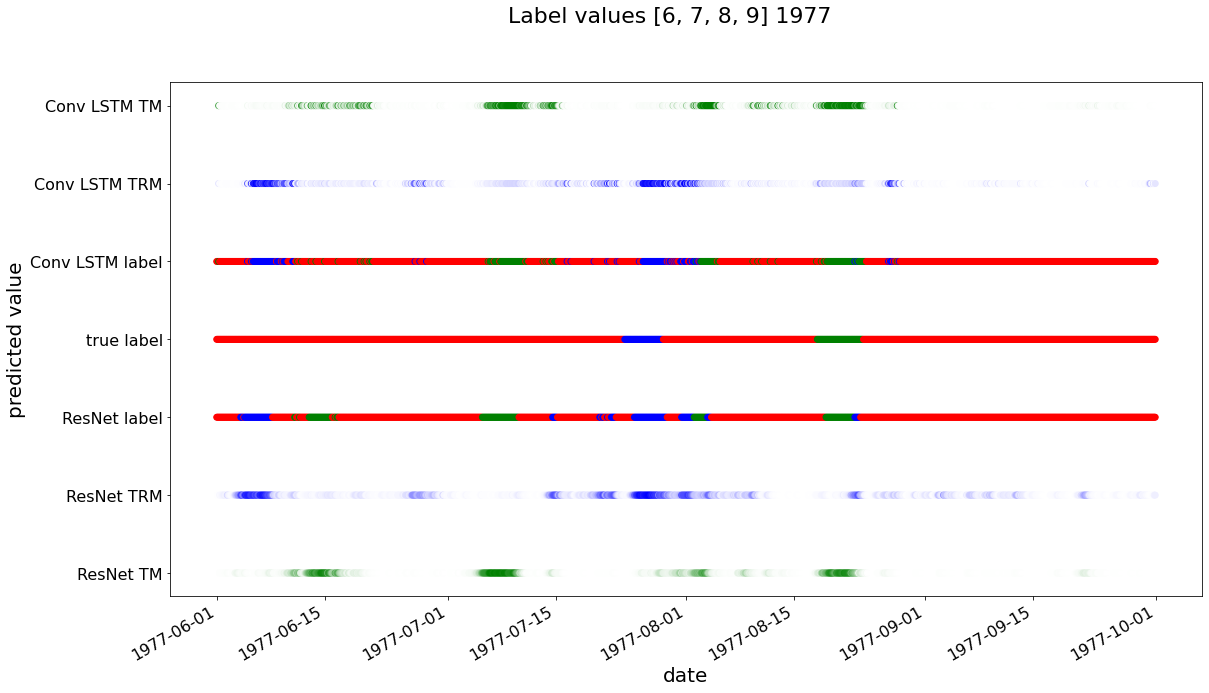

In [13]:
plot_year(1977, [6,7,8,9], save=True)

Exemplary, figure 1 show the predictions for the entire year 1995. The 6 month of 1995 are infested by several
occurrences of the Großwetterlage Trog Mitteleuropa. In the second half of 1995, no TRM have been observed. In
September, the only Tief in 1995 wafts over central Europe.
The ConvLSTM performs poorly in 1995 and is only able to predict the TRM in the first quarter of the year. While TRM is classified
in spring, the labeling is comparable stable, meaning that this Network seems able to classify streaks of labels. This
stability in short term labeling is also visible in the ConvLSTMs' soft label predictions of TM and TRM. The scores for
both labels seem to have smooth transitions during time. Especially, in case of the prediction of TRM this smoothness seems
to come at a certain price. TM soft label values are rather constant in 1995.
In contrast to those properties, the Resnet seems able to detect the TMs in the first half of 1995. Within the single TMs,
ResNet tends to label some time stamps to wrong labels, implying that ths network is not really able to classify streaks.
In the second half of 1995, the ResNet misclassified singular time stamps as TM. Additionally, the network is not able
to label the Tief in September correctly. However, the ResNet soft label predictions of TM indicate that the network was
aware but not able to detect the Tief (see Figure 2).
Figure 3 shows the explicit uncertainty of both deep neural networks in predicting TRM. Especially in transition
periods hard label predictions get wiggly.

C:\Users\Henri\LRZ Sync+Share\Semester3_Master\Climex\post_analysis\plot_years.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  resnet_data[:, [3, 4, 5]] = softmax(torch.tensor(resnet_data[:, [3, 4, 5]]))


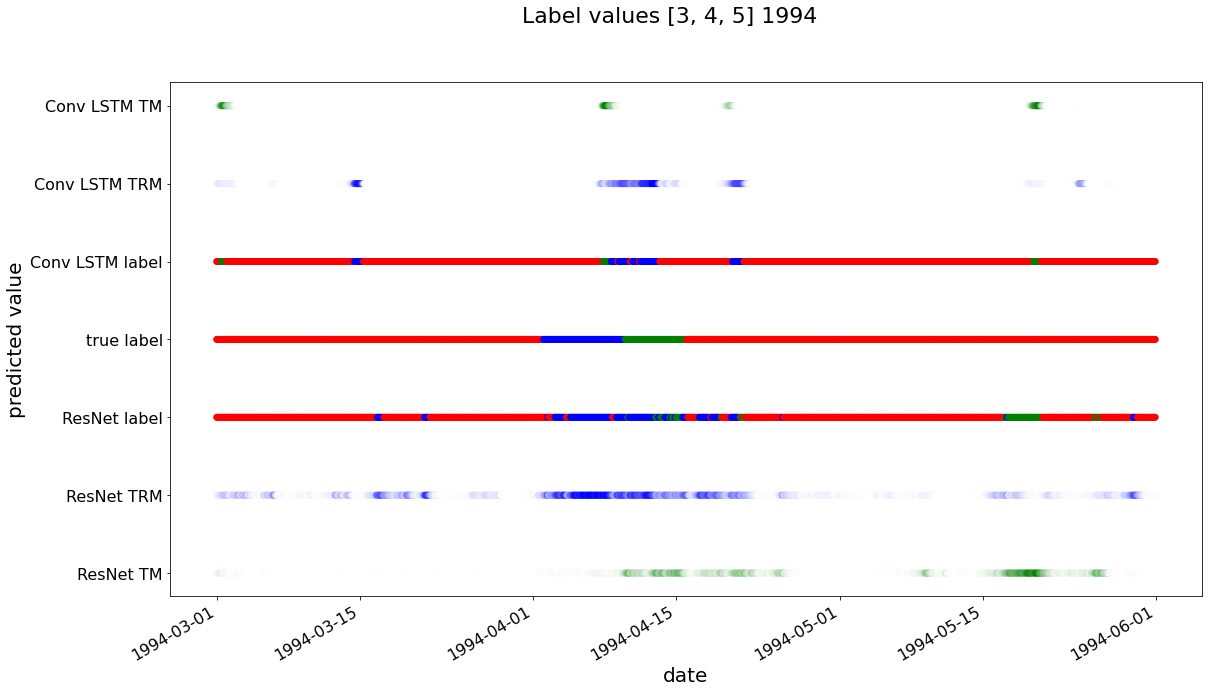

In [14]:
plot_year(1994, [3, 4, 5])

Ideas:
- seasonality for ResNet or smooth out predicting (by runnning average)
- reduce time stamps (maybe daily/ 6 houurly) increas grid size ==> more change in pixel values during time
- Alternative size up the scope of the lstm, constant soft labels might be caused by windows that always contain the same
labels but no shifts in labels/ Scope too small for transition =>x network wont be able to learn the transition periods.
- Reinforce the prediction of TM even more (higher class weights)
- Very experimental: Attach the ResNet by autoregressiv processes to smooth out labeling ... maybe by the last 2 days...
- Introduce multiclass labeles for the transition periods between two periods, allowing the network to classify both labels,here...